# DVD RENTAL DATABASE

### Data Preprocessing

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("dataset/dvd_rental_joined_data.csv")

# Data Overview
print("datatype:", df.info())
print("\nShape:", df.shape)
print("\nUnique values per column:", df.nunique())
print("\nMissing values:", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80115 entries, 0 to 80114
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   film_title          80115 non-null  object 
 1   film_description    80115 non-null  object 
 2   release_year        80115 non-null  int64  
 3   rental_duration     80115 non-null  int64  
 4   rental_rate         80115 non-null  float64
 5   length              80115 non-null  int64  
 6   replacement_cost    80115 non-null  float64
 7   rating              80115 non-null  object 
 8   special_features    80115 non-null  object 
 9   film_language       80115 non-null  object 
 10  film_genre          80115 non-null  object 
 11  rental_date         80115 non-null  object 
 12  return_date         79106 non-null  object 
 13  payment_amount      80115 non-null  float64
 14  payment_date        80115 non-null  object 
 15  actor_name          80115 non-null  object 
 16  cust

In [70]:
# Find columns with missing values
missing_columns = df.columns[df.isnull().any()]

print(f"Columns with missing values: {missing_columns}")
print("\nMissing values in each column:\n", df[missing_columns].isnull().sum())

# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Filter only columns that have missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Print the percentage of missing values in each column, rounded to 2 decimal places
print("\nPercentage of missing values in each column:")
print(missing_percentage.round(2))

Columns with missing values: Index(['return_date', 'district'], dtype='object')

Missing values in each column:
 return_date    1009
district        524
dtype: int64

Percentage of missing values in each column:
return_date    1.26
district       0.65
dtype: float64


In [71]:
# Drop rows with missing values
df.dropna(inplace=True)

# Check for duplicates and drop if any
print("\nDuplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Verify changes
print("\nShape after cleaning:", df.shape)


Duplicate rows: 0

Shape after cleaning: (78582, 27)


In [72]:
df['special_features'].unique()

array(['{"Deleted Scenes","Behind the Scenes"}', '{Trailers}',
       '{"Behind the Scenes"}', '{Trailers,"Deleted Scenes"}',
       '{Commentaries}', '{Commentaries,"Deleted Scenes"}',
       '{Trailers,Commentaries}', '{"Deleted Scenes"}',
       '{Trailers,"Deleted Scenes","Behind the Scenes"}',
       '{Commentaries,"Behind the Scenes"}',
       '{Trailers,"Behind the Scenes"}',
       '{Commentaries,"Deleted Scenes","Behind the Scenes"}',
       '{Trailers,Commentaries,"Deleted Scenes","Behind the Scenes"}',
       '{Trailers,Commentaries,"Behind the Scenes"}',
       '{Trailers,Commentaries,"Deleted Scenes"}'], dtype=object)

In [73]:
# Clean up the strings to remove curly braces and quotes
df['special_features'] = df['special_features'].str.replace(r'[{}"]', '', regex=True)

# Split the string into individual features
df['special_features'] = df['special_features'].str.split(',')

# Get all unique features
unique_features = set(feature for sublist in df['special_features'] for feature in sublist)
print(unique_features)

{'Commentaries', 'Deleted Scenes', 'Trailers', 'Behind the Scenes'}


In [74]:
for feature in unique_features:
    df[feature] = df['special_features'].apply(lambda x: feature in x)

# Display the original 'special_features' column along with the newly created columns
df_spec = df[['special_features'] + list(unique_features)]
df_spec

,special_features,Commentaries,Deleted Scenes,Trailers,Behind the Scenes
0,"[Deleted Scenes, Behind the Scenes]",False,True,False,True
1,"[Deleted Scenes, Behind the Scenes]",False,True,False,True
2,"[Deleted Scenes, Behind the Scenes]",False,True,False,True
3,"[Deleted Scenes, Behind the Scenes]",False,True,False,True
4,"[Deleted Scenes, Behind the Scenes]",False,True,False,True
...,...,...,...,...,...
79111,"[Trailers, Commentaries, Behind the Scenes]",True,False,True,True
79112,"[Trailers, Commentaries, Behind the Scenes]",True,False,True,True
79113,"[Trailers, Commentaries, Behind the Scenes]",True,False,True,True
79114,"[Trailers, Commentaries, Behind the Scenes]",True,False,True,True


In [75]:
# Drop specific columns from the original DataFrame
df.drop(columns=df_spec, inplace=True)

In [76]:
# List of columns to drop that are unnecessary or mostly unique
columns_to_drop = ['email_id', 'phone_number', 'address']

# Drop the columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [77]:
df['rental_date'] = pd.to_datetime(df['rental_date'])
df['return_date'] = pd.to_datetime(df['return_date'])

# Extract month and day from rental_date

df['rental_month'] = df['rental_date'].dt.month
df['rental_day'] = df['rental_date'].dt.day

# Extract month and day from return_date

df['return_month'] = df['return_date'].dt.month
df['return_day'] = df['return_date'].dt.day

# Calculate rental duration (in days)
df['rental_duration_days'] = (df['return_date'] - df['rental_date']).dt.days

In [78]:
print("\nColumn Names:", df.columns)
print("datatype:", df.info())
print("\nShape:", df.shape)


Column Names: Index(['film_title', 'film_description', 'release_year', 'rental_duration',
       'rental_rate', 'length', 'replacement_cost', 'rating', 'film_language',
       'film_genre', 'rental_date', 'return_date', 'payment_amount',
       'payment_date', 'actor_name', 'customer_name', 'customer_activity',
       'district', 'city', 'country', 'staff_name', 'staff_availability',
       'store_id', 'rental_month', 'rental_day', 'return_month', 'return_day',
       'rental_duration_days'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 78582 entries, 0 to 79115
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   film_title            78582 non-null  object        
 1   film_description      78582 non-null  object        
 2   release_year          78582 non-null  int64         
 3   rental_duration       78582 non-null  int64         
 4   rental_rate           

In [79]:
df.head()

,film_title,film_description,release_year,rental_duration,rental_rate,length,replacement_cost,rating,film_language,film_genre,...,city,country,staff_name,staff_availability,store_id,rental_month,rental_day,return_month,return_day,rental_duration_days
0,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006,6,4.99,153,19.99,R,English,Horror,...,Ede,Netherlands,Jon Stephens,True,2,6,15,6,24,8
1,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006,6,4.99,153,19.99,R,English,Horror,...,Ede,Netherlands,Jon Stephens,True,2,6,15,6,24,8
2,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006,6,4.99,153,19.99,R,English,Horror,...,Ede,Netherlands,Jon Stephens,True,2,6,15,6,24,8
3,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006,6,4.99,153,19.99,R,English,Horror,...,Ede,Netherlands,Jon Stephens,True,2,6,15,6,24,8
4,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006,6,4.99,153,19.99,R,English,Horror,...,Ede,Netherlands,Jon Stephens,True,2,6,15,6,24,8


In [80]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical Columns:", numerical_cols)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)

Numerical Columns: ['release_year', 'rental_duration', 'rental_rate', 'length', 'replacement_cost', 'payment_amount', 'store_id', 'rental_duration_days']

Categorical Columns: ['film_title', 'film_description', 'rating', 'film_language', 'film_genre', 'payment_date', 'actor_name', 'customer_name', 'district', 'city', 'country', 'staff_name']


### Exploratory Data Analysis and Visualization

### 1) Customer Analysis

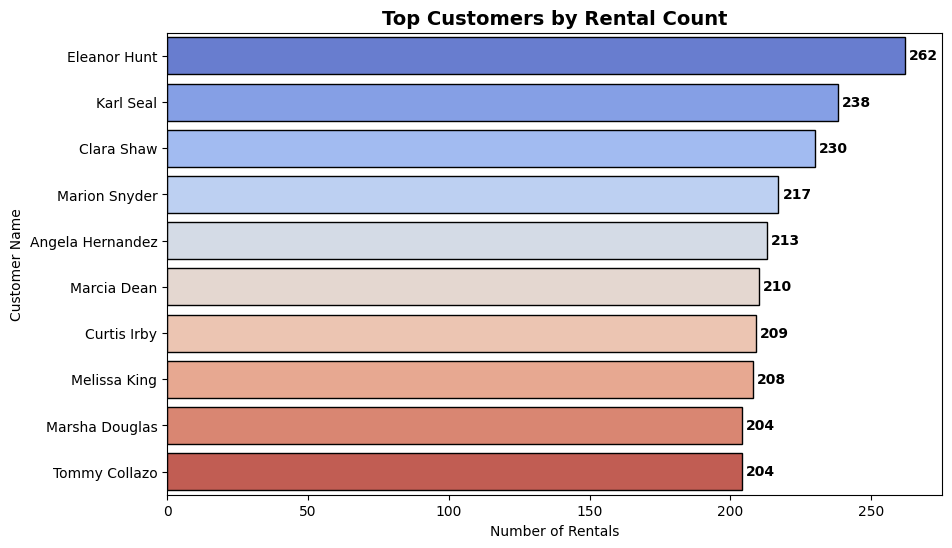

Top Customers with Rental Count:
Eleanor Hunt: 262 rentals
Karl Seal: 238 rentals
Clara Shaw: 230 rentals
Marion Snyder: 217 rentals
Angela Hernandez: 213 rentals
Marcia Dean: 210 rentals
Curtis Irby: 209 rentals
Melissa King: 208 rentals
Marsha Douglas: 204 rentals
Tommy Collazo: 204 rentals


In [81]:
# Top 10 customers by rental count
top_customers = df['customer_name'].value_counts().nlargest(10)

# Plot the top 10 customers by rental count
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    y=top_customers.index, 
    x=top_customers.values,
    hue=top_customers.index,
    palette='coolwarm',
    edgecolor='black'
)

# Add rental count values above the bars
for index, value in enumerate(top_customers.values):
    plt.text(value + 1.5, index, str(value), va='center', fontsize=10, fontweight='bold')

# Plot settings
plt.title('Top Customers by Rental Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Rentals')
plt.ylabel('Customer Name')
plt.show()

# Display the top customers with their rental counts
print("Top Customers with Rental Count:")
for customer, count in zip(top_customers.index, top_customers.values):
    print(f'{customer}: {count} rentals')

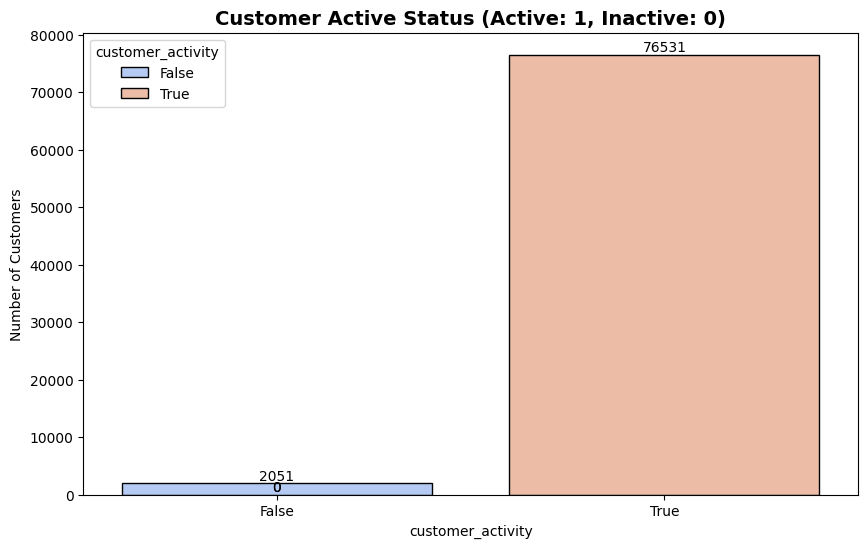

In [82]:
# Count of Active vs Non-Active customers
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='customer_activity', hue='customer_activity', edgecolor='black', palette='coolwarm')

# Calculate the counts of active and non-active customers
active_count = df['customer_activity'].value_counts().get('Active', 1)
non_active_count = df['customer_activity'].value_counts().get('Inactive', 0)

# Set the title to include counts
plt.title(f'Customer Active Status (Active: {active_count}, Inactive: {non_active_count})', fontsize=14, fontweight='bold')
plt.xlabel('customer_activity')
plt.ylabel('Number of Customers')

# Show the counts on the bars as whole numbers
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom')

plt.show()

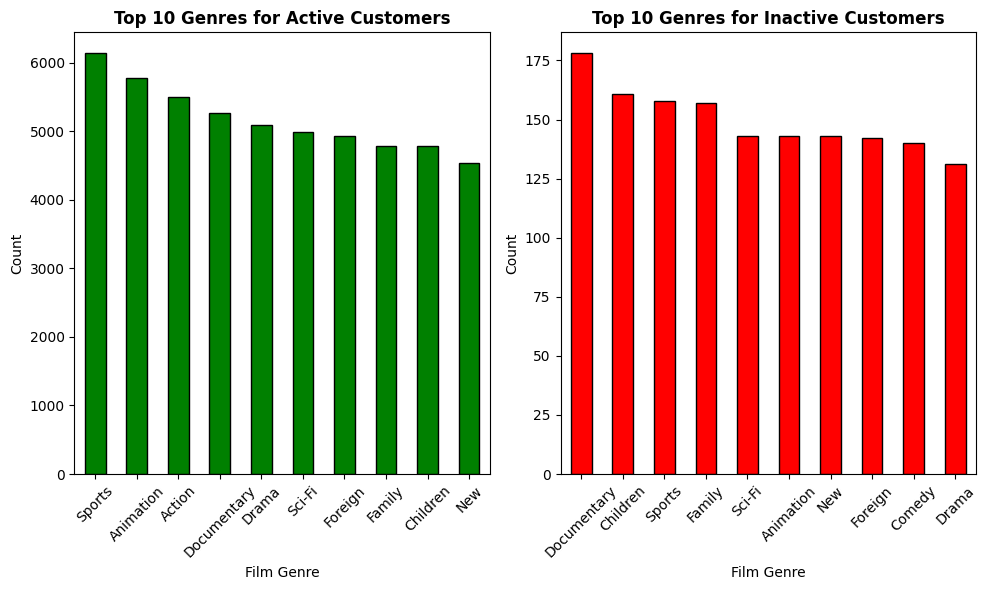

In [83]:
# Film preferences of Active vs Non-Active customers
plt.figure(figsize=(10, 6))
active_genres = df[df['customer_activity'] == True]['film_genre'].value_counts().head(10)
inactive_genres = df[df['customer_activity'] == False]['film_genre'].value_counts().head(10)

# Plot for active customers
plt.subplot(1, 2, 1)
active_genres.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Genres for Active Customers', fontsize=12, fontweight='bold')
plt.xlabel('Film Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for inactive customers
plt.subplot(1, 2, 2)
inactive_genres.plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Genres for Inactive Customers', fontsize=12, fontweight='bold')
plt.xlabel('Film Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

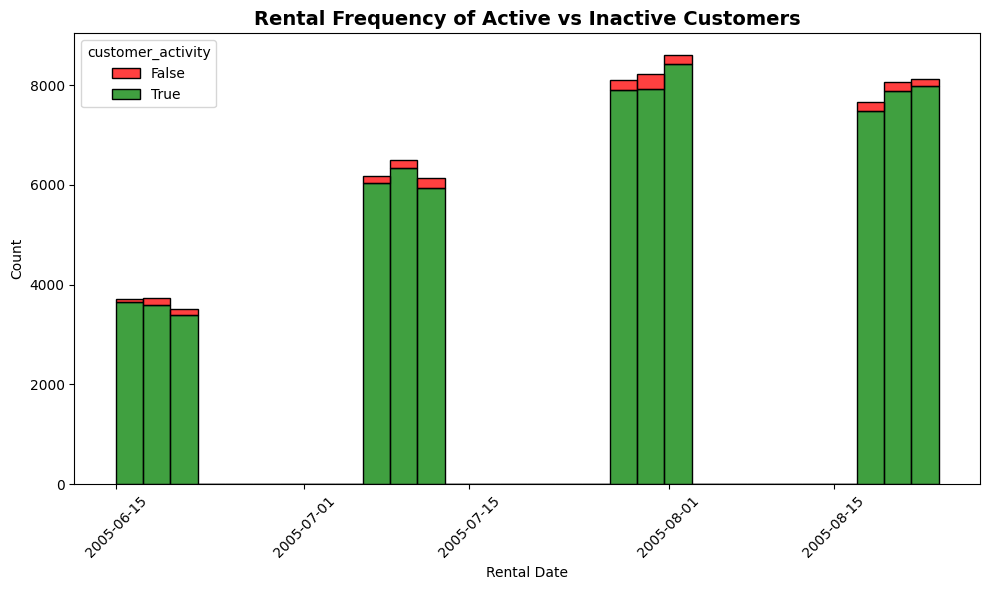

In [84]:
# Ensure rental_date is in datetime format
df['rental_date'] = pd.to_datetime(df['rental_date'])

# Define a custom color palette
custom_palette = ['red', 'green']

# Plot using the custom palette
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rental_date', hue='customer_activity', multiple='stack', palette=custom_palette, bins=30)
plt.title('Rental Frequency of Active vs Inactive Customers', fontsize=14, fontweight='bold')
plt.xlabel('Rental Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2) Geographical Analysis

Rental Counts by district: district
Buenos Aires        1301
California          1268
West Bengali        1254
So Paulo            1200
Shandong            1138
Southern Tagalog    1044
Uttar Pradesh       1037
Maharashtra          916
England              846
Taipei               679
Name: count, dtype: int64


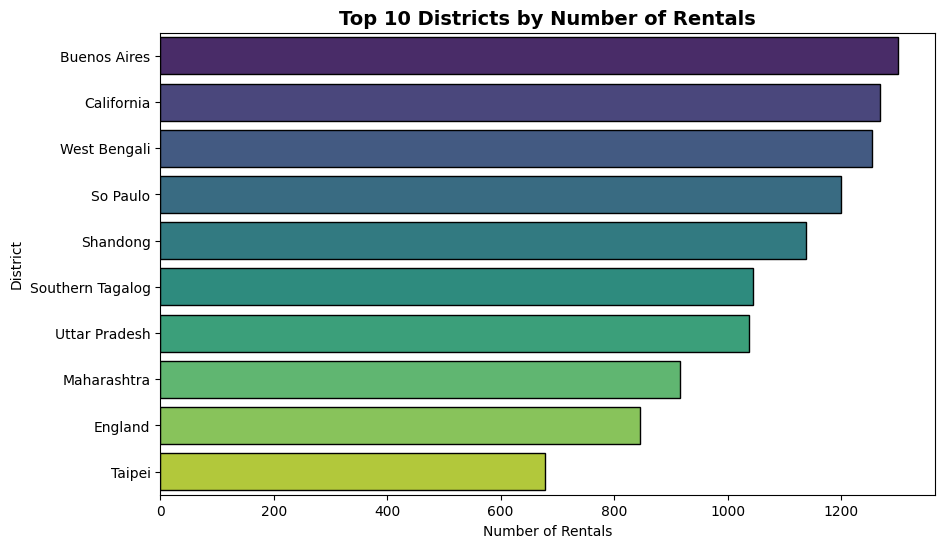

In [85]:
# District Analysis
plt.figure(figsize=(10, 6))

# Get the rental counts per district
district_rentals = df['district'].value_counts().head(10)
print("Rental Counts by district:", district_rentals)

# Plot settings
sns.barplot(x=district_rentals.values, y=district_rentals.index, hue=district_rentals.index, palette='viridis', edgecolor='black')
plt.title('Top 10 Districts by Number of Rentals', fontsize=14, fontweight='bold')
plt.xlabel('Number of Rentals')
plt.ylabel('District')
plt.show()

Rental Counts by City: city
Saint-Denis            262
London                 248
Cape Coral             238
Molodetno              230
Santa Brbara dOeste    217
Aurora                 216
Shimonoseki            213
Tanza                  210
Richmond Hill          209
Lungtan                208
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

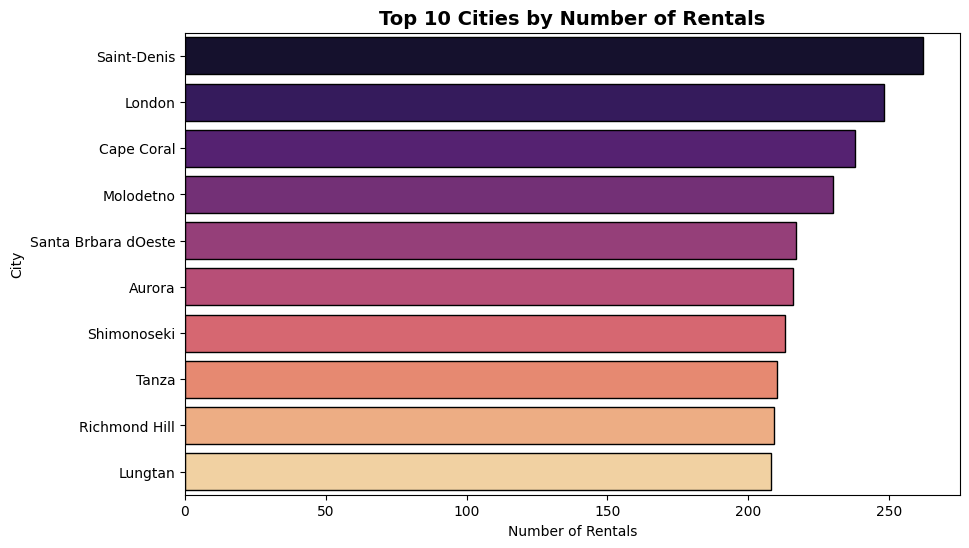

In [86]:
# City Analysis
plt.figure(figsize=(10, 6))

# Get the rental counts per city
city_rentals = df['city'].value_counts().head(10)
print("Rental Counts by City:", city_rentals)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=city_rentals.values, y=city_rentals.index, hue=city_rentals.index, palette='magma', edgecolor='black')
plt.title('Top 10 Cities by Number of Rentals', fontsize=14, fontweight='bold')
plt.xlabel('Number of Rentals')
plt.ylabel('City')
plt.show()

Rental Counts by Country: country
India                 7686
China                 6917
United States         4866
Japan                 4085
Mexico                4037
Brazil                3655
Russian Federation    3485
Philippines           2892
Turkey                1873
Indonesia             1818
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

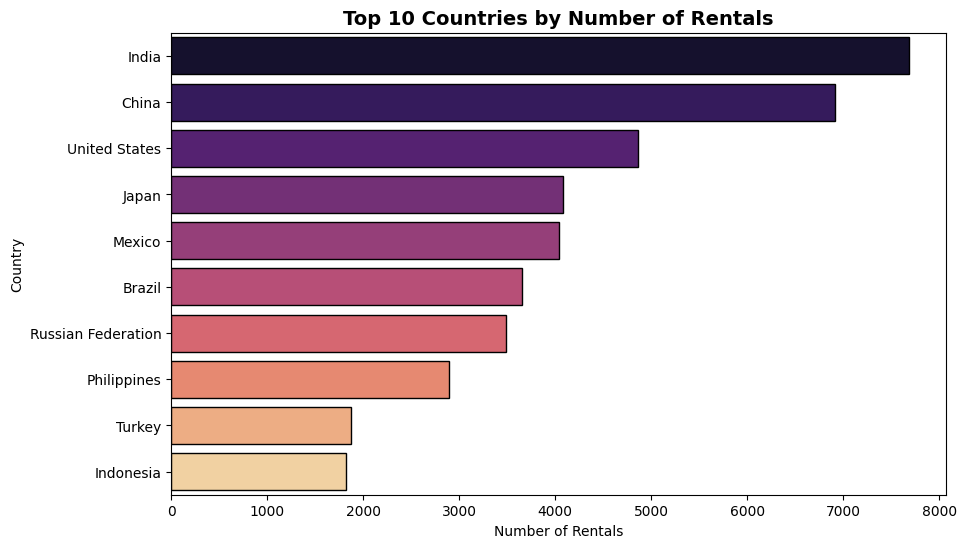

In [87]:
# Country Analysis
plt.figure(figsize=(10, 6))

# Get the rental counts per country
country_rentals = df['country'].value_counts().head(10)
print("Rental Counts by Country:", country_rentals)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=country_rentals.values, y=country_rentals.index, hue=country_rentals.index, palette='magma', edgecolor='black')

# Plot settings
plt.title('Top 10 Countries by Number of Rentals', fontsize=14, fontweight='bold')
plt.xlabel('Number of Rentals')
plt.ylabel('Country')
plt.show()

### 3) Film Rental Analysis

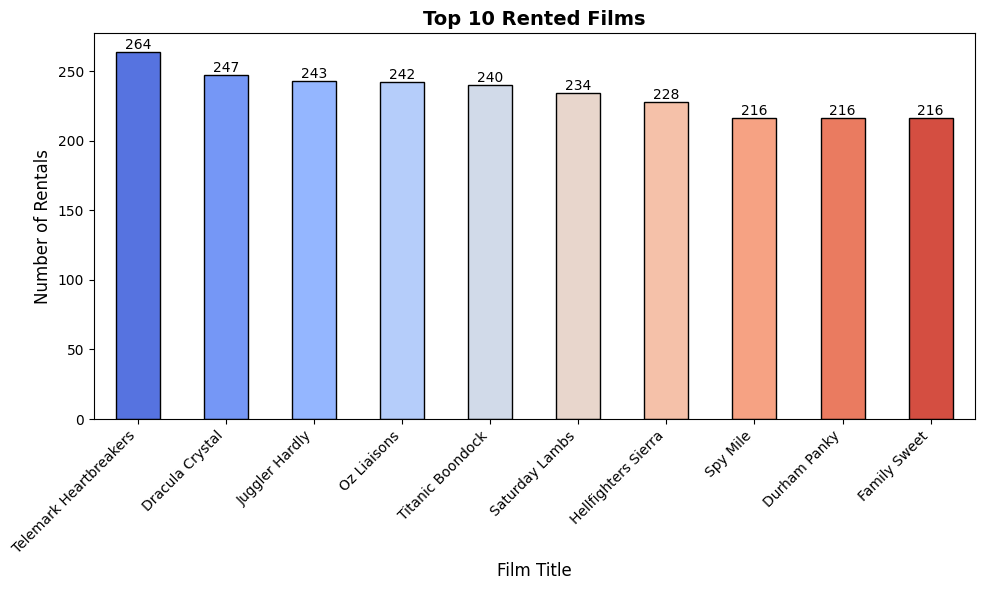

Top rented films: film_title
Telemark Heartbreakers    264
Dracula Crystal           247
Juggler Hardly            243
Oz Liaisons               242
Titanic Boondock          240
Saturday Lambs            234
Hellfighters Sierra       228
Spy Mile                  216
Durham Panky              216
Family Sweet              216
Name: count, dtype: int64


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a color palette using Seaborn for better aesthetics
sns.set_palette('pastel')

# Top rented films
top_films = df['film_title'].value_counts().head(10)

# Create a bar chart with customizations
plt.figure(figsize=(10, 6))
top_films.plot(kind='bar', color=sns.color_palette('coolwarm', len(top_films)), edgecolor='black')  # Set bar colors using a color palette

# Add chart title and labels
plt.title('Top 10 Rented Films', fontsize=14, fontweight='bold')
plt.xlabel('Film Title', fontsize=12)
plt.ylabel('Number of Rentals', fontsize=12)

# Add a grid for better visual clarity
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate bars with rental counts
for index, value in enumerate(top_films):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

# Print top rented films
top_films = df['film_title'].value_counts().head(10)
print("Top rented films:", top_films)

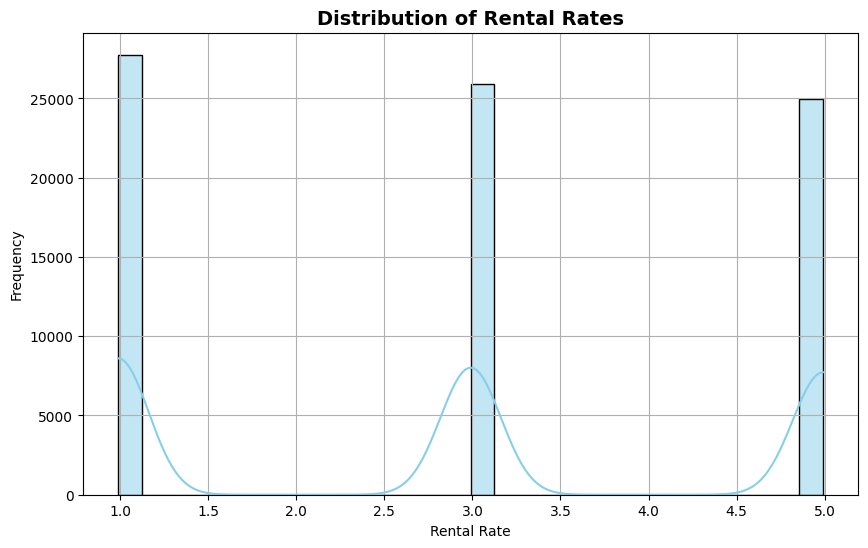

Rental Rates with Counts:
Rental Rate: 0.99 - Count: 27759
Rental Rate: 2.99 - Count: 25886
Rental Rate: 4.99 - Count: 24937


In [89]:
# Rental Rates Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['rental_rate'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Rental Rates', fontsize=14, fontweight='bold')
plt.xlabel('Rental Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary of rental rates with their counts
rental_rate_counts = df['rental_rate'].value_counts().sort_index()

# Print rental rates with their counts
print("Rental Rates with Counts:")
for rate, count in rental_rate_counts.items():
    print(f"Rental Rate: {rate:.2f} - Count: {count}")

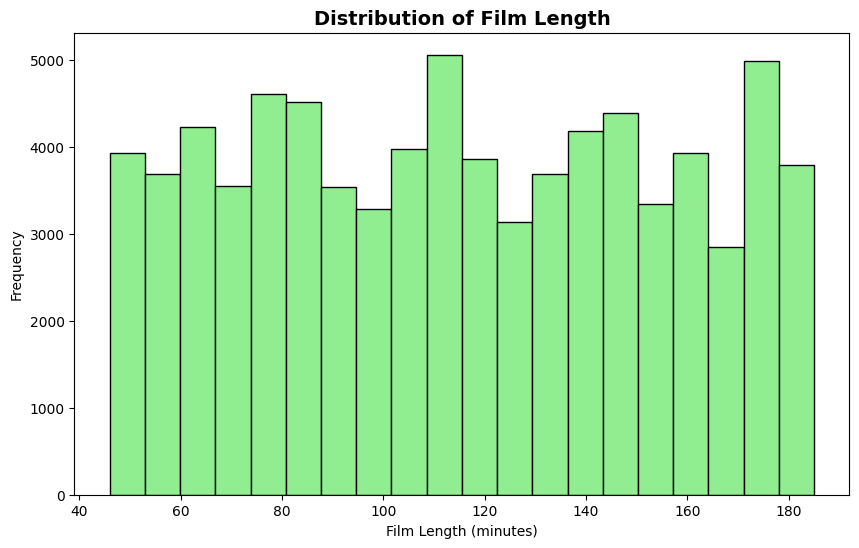

Film Length Groups with Counts:
Long (> 180 min): 36477
Medium (60-120 min): 34483
Short (< 60 min): 7622


In [90]:
# Define film length groups
def categorize_length(length):
    if length < 60:
        return 'Short (< 60 min)'
    elif 60 <= length < 120:
        return 'Medium (60-120 min)'
    else:
        return 'Long (> 180 min)'

# Create a new column for film length groups
df['film_length_group'] = df['length'].apply(categorize_length)

# Plotting the histogram of film lengths
plt.figure(figsize=(10, 6))
plt.hist(df['length'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Film Length', fontsize=14, fontweight='bold')
plt.xlabel('Film Length (minutes)')
plt.ylabel('Frequency')
plt.show()

# Count of films in each length group
length_group_counts = df['film_length_group'].value_counts()

# Print the counts of each length group
print("Film Length Groups with Counts:")
for group, count in length_group_counts.items():
    print(f"{group}: {count}")

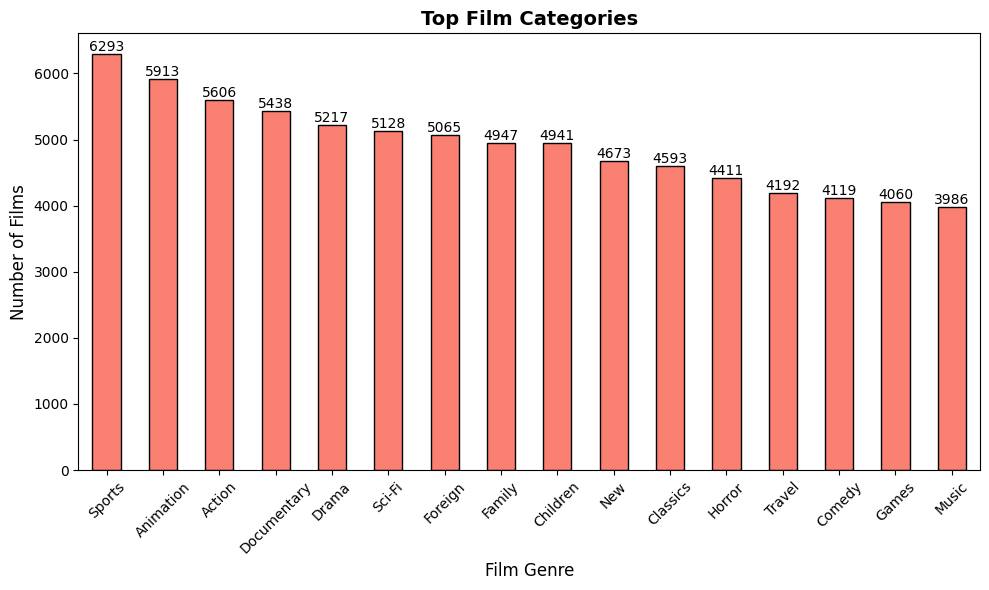

Top rented films: film_genre
Sports         6293
Animation      5913
Action         5606
Documentary    5438
Drama          5217
Sci-Fi         5128
Foreign        5065
Family         4947
Children       4941
New            4673
Classics       4593
Horror         4411
Travel         4192
Comedy         4119
Games          4060
Music          3986
Name: count, dtype: int64


In [91]:
# Top Film Categories
category_counts = df['film_genre'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='salmon', edgecolor='black')

# Add chart title and labels
plt.title('Top Film Categories', fontsize=14, fontweight='bold')
plt.xlabel('Film Genre', fontsize=12)
plt.ylabel('Number of Films', fontsize=12)
plt.xticks(rotation=45)

# Annotate bars with film counts
for index, value in enumerate(category_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

# Print top rented films
top_film_genre = df['film_genre'].value_counts()
print("Top rented films:", top_film_genre)

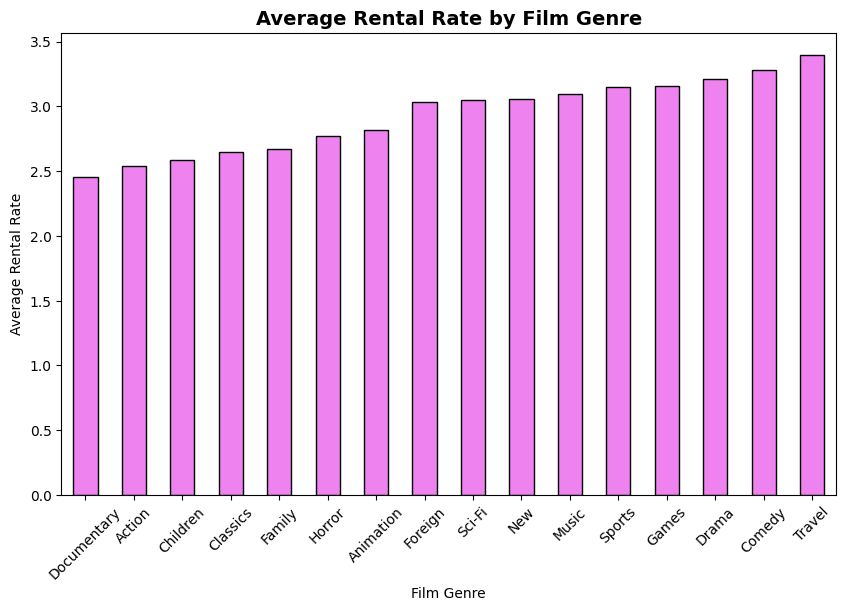

Average Rental Rate by Film Genre: film_genre
Documentary    2.453773
Action         2.537984
Children       2.583605
Classics       2.646434
Family         2.668189
Horror         2.773269
Animation      2.817499
Foreign        3.033435
Sci-Fi         3.047722
New            3.054627
Music          3.094867
Sports         3.147953
Games          3.156010
Drama          3.211583
Comedy         3.280362
Travel         3.396489
Name: rental_rate, dtype: float64


In [92]:
# Average rental rate by genre
avg_rental_by_genre = df.groupby('film_genre')['rental_rate'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_rental_by_genre.plot(kind='bar', color='violet', edgecolor='black')
plt.title('Average Rental Rate by Film Genre', fontsize=14, fontweight='bold')
plt.xlabel('Film Genre')
plt.ylabel('Average Rental Rate')
plt.xticks(rotation=45)
plt.show()

# Calculate average rental rate by film genre
avg_rental_by_genre = df.groupby('film_genre')['rental_rate'].mean().sort_values()

# Print the average rental rates
print("Average Rental Rate by Film Genre:", avg_rental_by_genre)

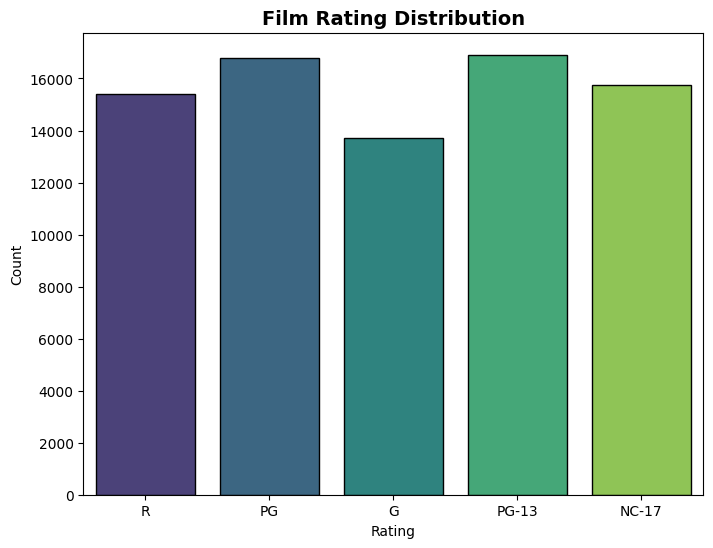

Film Ratings with Counts:
PG-13: 16914
PG: 16779
NC-17: 15768
R: 15403
G: 13718


In [93]:
# Film Rating Distribution

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rating', hue='rating', palette='viridis', edgecolor='black', legend=False)
plt.title('Film Rating Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Film ratings with their counts
rating_counts = df['rating'].value_counts()

# Print the ratings with counts
print("Film Ratings with Counts:")
for rating, count in rating_counts.items():
    print(f"{rating}: {count}")

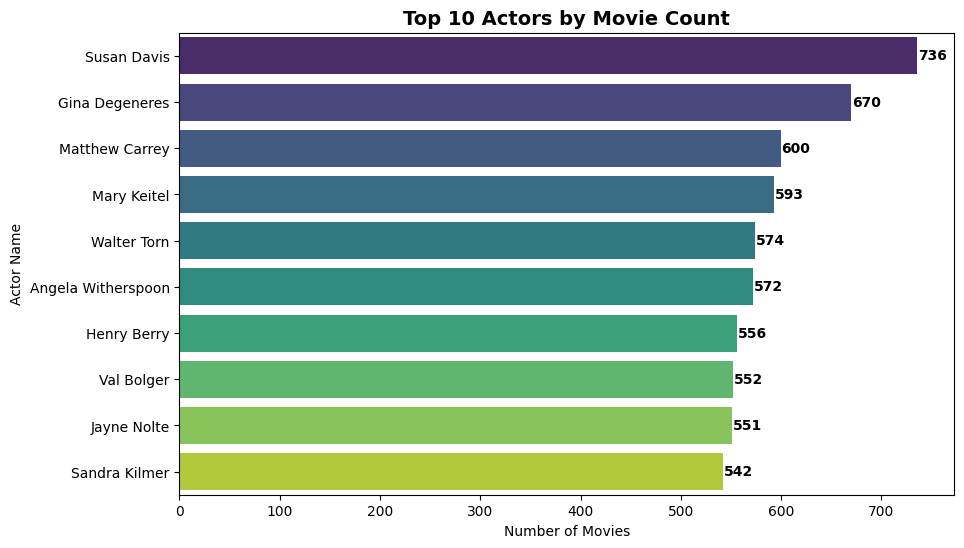

Top Actors with movie count:
Susan Davis - 736 movies
Gina Degeneres - 670 movies
Matthew Carrey - 600 movies
Mary Keitel - 593 movies
Walter Torn - 574 movies
Angela Witherspoon - 572 movies
Henry Berry - 556 movies
Val Bolger - 552 movies
Jayne Nolte - 551 movies
Sandra Kilmer - 542 movies


In [94]:
# Count movies per actor
actor_counts = df.groupby('actor_name').size().reset_index(name='movie_count').sort_values(by='movie_count', ascending=False)

# Plot the top 10 actors by movie count
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='movie_count', y='actor_name', hue='actor_name', data=actor_counts.head(10), palette='viridis')

# Add movie count values above the bars
for index, value in enumerate(actor_counts.head(10)['movie_count']):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10, fontweight='bold')

# Plot settings
plt.title('Top 10 Actors by Movie Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Movies')
plt.ylabel('Actor Name')
plt.legend([], [], frameon=False)  # Remove legend
plt.show()

# Identify the top 10 actors with the maximum number of movies
top_10_actors = actor_counts.head(10)
print("Top Actors with movie count:")
for index, row in top_10_actors.iterrows():
    print(f'{row["actor_name"]} - {row["movie_count"]} movies')

### 3) Time-series Analysis

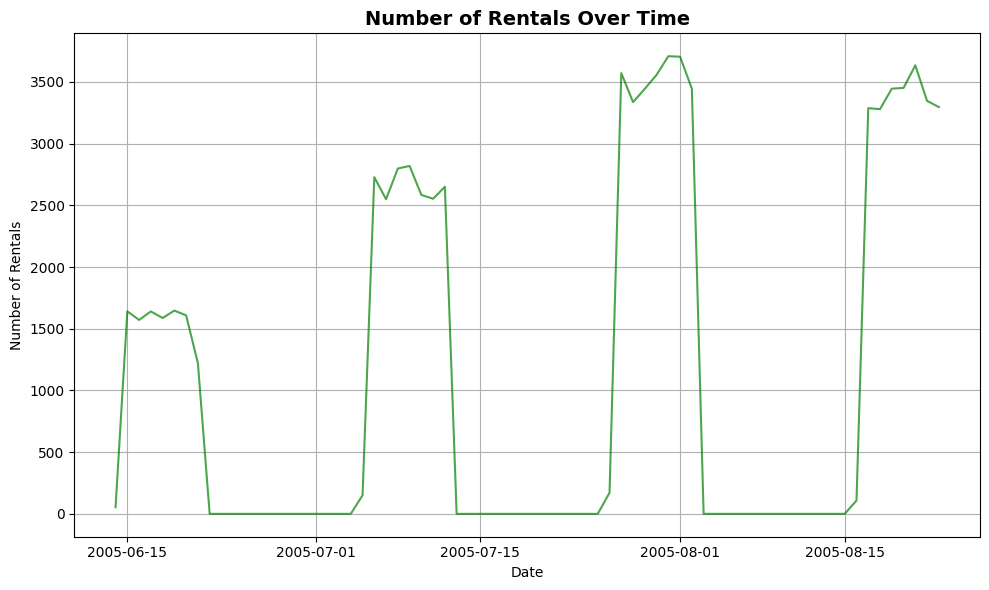

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'rental_date' is in datetime format
df['rental_date'] = pd.to_datetime(df['rental_date'])

# Resample the data on a daily frequency
rentals_per_day = df.resample('D', on='rental_date').size()

# Plotting the number of rentals over time
plt.figure(figsize=(10, 6))
plt.plot(rentals_per_day.index, rentals_per_day.values, color='green', alpha=0.7)

# Adding title and labels
plt.title('Number of Rentals Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')

# Adding gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

Rental Count by Month: rental_month
6    10969
7    36618
8    30995
Name: count, dtype: int64


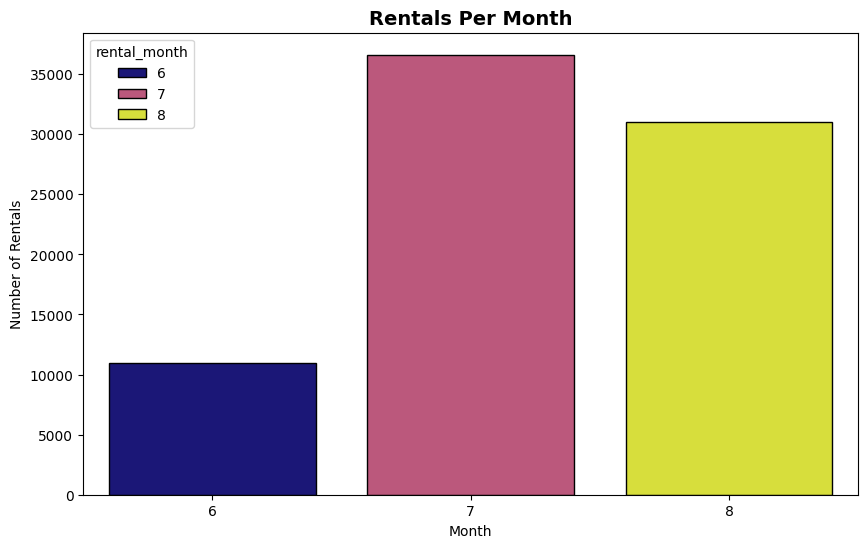

In [96]:
df['rental_month'] = df['rental_date'].dt.month
rentals_by_month = df['rental_month'].value_counts().sort_index()

# Print rental count by month
print("Rental Count by Month:", rentals_by_month)

# Plot the rentals per month
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_by_month.index, y=rentals_by_month.values, hue=rentals_by_month.index, palette='plasma', edgecolor='black')
plt.title('Rentals Per Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.show()

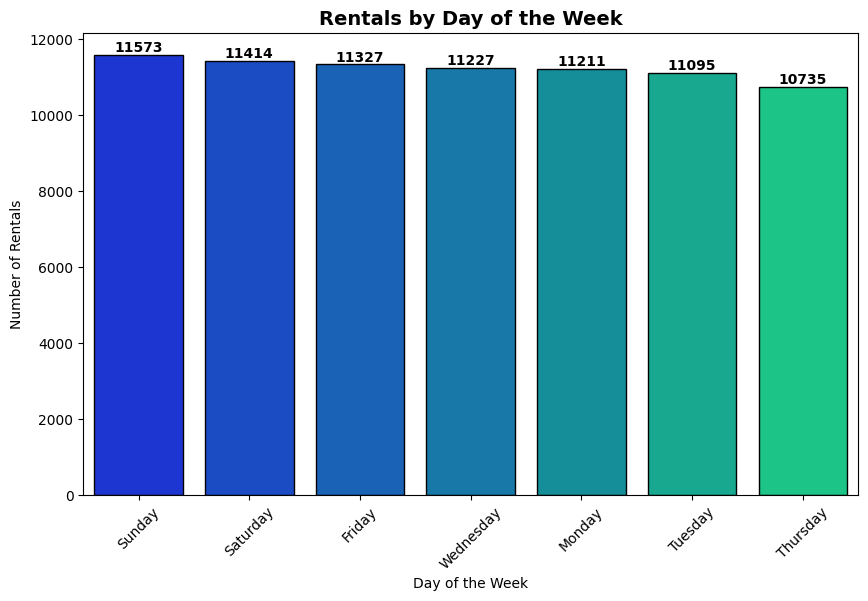

In [97]:
# Rentals by day of the week
df['rental_day_of_week'] = df['rental_date'].dt.day_name()
rentals_by_week = df['rental_day_of_week'].value_counts()

# Print rental count by month
# print("Rental Count by Week:", rentals_by_week)

# Plot the rentals by day of the week
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x=rentals_by_week.index, 
    y=rentals_by_week.values, 
    hue=rentals_by_week.index,
    edgecolor='black',
    palette='winter', 
    dodge=False
)

# Add rental counts above bars
for index, value in enumerate(rentals_by_week.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot settings
plt.title('Rentals by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remove legend
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12988\2051458702.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rentals_by_days.index, y=rentals_by_days.values, palette='plasma', edgecolor='black',)


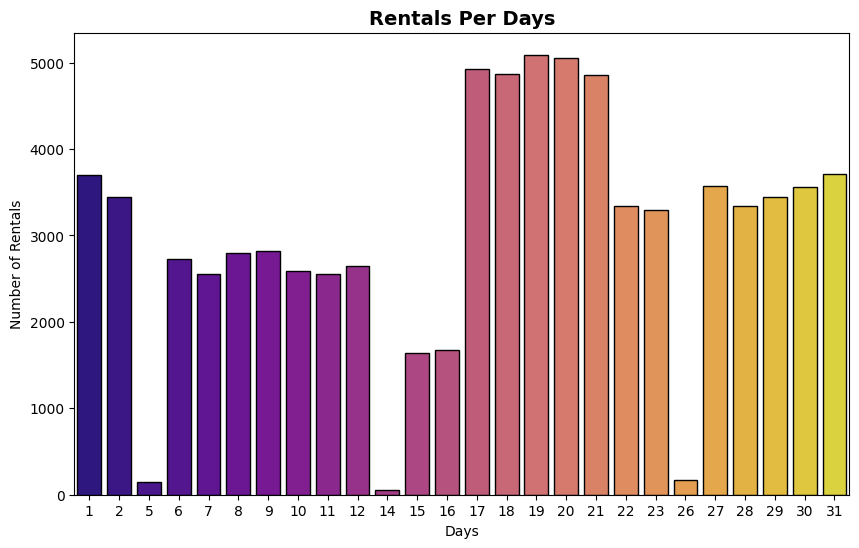

In [98]:
# Rentals by days
df['rental_days'] = df['rental_date'].dt.day
rentals_by_days = df['rental_days'].value_counts().sort_index()

# Print rental count by day
# print("Rental Count by Day:", rentals_by_days)

plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_by_days.index, y=rentals_by_days.values, palette='plasma', edgecolor='black',)
plt.title('Rentals Per Days', fontsize=14, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Number of Rentals')
plt.show()

In [99]:
# Identify constant columns
constant_columns = [col for col in df.columns if df[col].nunique() <= 1]
print("Constant Columns:", constant_columns)

# Drop constant columns
df.drop(columns=constant_columns, inplace=True)

# Retrieve column names
print("\nColumn names", df.columns)

# Display the shape of the DataFrame after dropping columns
print("\nShape of DataFrame after dropping constant columns:", df.shape)

Constant Columns: ['release_year', 'film_language', 'staff_availability']

Column names Index(['film_title', 'film_description', 'rental_duration', 'rental_rate',
       'length', 'replacement_cost', 'rating', 'film_genre', 'rental_date',
       'return_date', 'payment_amount', 'payment_date', 'actor_name',
       'customer_name', 'customer_activity', 'district', 'city', 'country',
       'staff_name', 'store_id', 'rental_month', 'rental_day', 'return_month',
       'return_day', 'rental_duration_days', 'film_length_group',
       'rental_day_of_week', 'rental_days'],
      dtype='object')

Shape of DataFrame after dropping constant columns: (78582, 28)


In [104]:
import pandas as pd

# Assume df is your DataFrame
# Columns to drop
columns_to_drop = [
    'film_title', 
    'film_description', 
    'payment_date', 
    'rental_date', 
    'return_date',
    # 'customer_name', 
    # 'actor_name',
    # 'district',
    # 'city',
    # 'country'
]

# Drop unnecessary columns
df_cleaned = df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame columns
print(df_cleaned.columns)

Index(['rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'film_genre', 'payment_amount', 'actor_name', 'customer_name',
       'customer_activity', 'district', 'city', 'country', 'staff_name',
       'store_id', 'rental_month', 'rental_day', 'return_month', 'return_day',
       'rental_duration_days', 'film_length_group', 'rental_day_of_week',
       'rental_days'],
      dtype='object')


In [105]:
# Identify numerical and categorical columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Print numerical and categorical columns
print("Numerical Columns:")
print(numerical_cols)
print("\nCategorical Columns:")
print(categorical_cols)

Numerical Columns:
['rental_duration', 'rental_rate', 'length', 'replacement_cost', 'payment_amount', 'store_id', 'rental_duration_days']

Categorical Columns:
['rating', 'film_genre', 'actor_name', 'customer_name', 'district', 'city', 'country', 'staff_name', 'film_length_group', 'rental_day_of_week']


In [108]:
# categorical_df = df_cleaned.select_dtypes(include=['object'])
# categorical_df

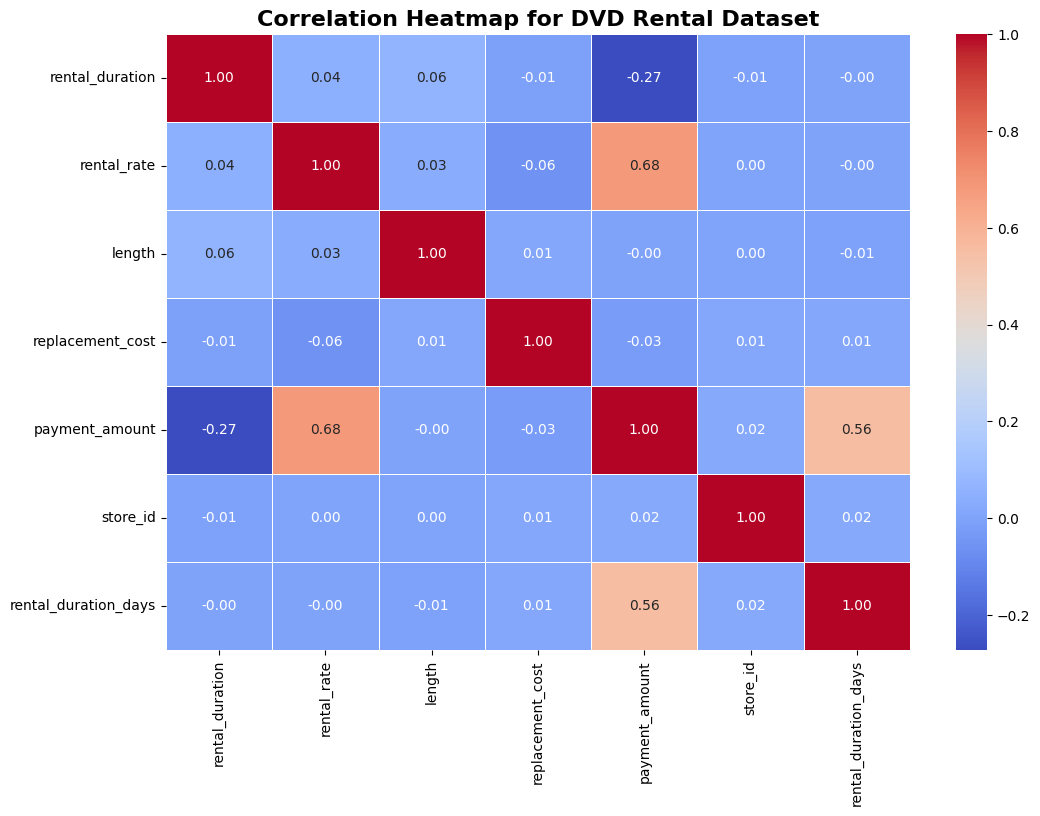

In [107]:
# Ensure only numerical columns are used for the correlation matrix
numerical_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with annotations and a colorbar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Add title to the heatmap
plt.title('Correlation Heatmap for DVD Rental Dataset', fontsize=16, fontweight='bold')
plt.show()